# Task 1.1 Data Understanding

**Authors:** Abderrahmane Salmi, Ricardo Talarico, Lorenzo Allegrini

Import Libraries & Load Datasets

In [54]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [55]:
tracks_df = pd.read_csv('../datasets/tracks.csv')
artists_df = pd.read_csv('../datasets/artists.csv', sep=';')

Initial Inspection

In [56]:
# First few tracks
tracks_df.head()

,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False
3,TR480968,ART04205421,Rosa Chemical,CEO by Rosa Chemical (Ft. Taxi B),CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,39890.0,...,single,1.0,2.0,169000.0,True,47.0,https://i.scdn.co/image/ab67616d0000b27367c03d...,ALB730959,Designer sui vestiti penso di essere un outlet...,False
4,TR585039,ART04205421,Rosa Chemical,LONDRA by Rosa Chemical (Ft. Rkomi),LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,35432.0,...,album,1.0,8.0,194779.0,True,41.0,https://i.scdn.co/image/ab67616d0000b273fcdb60...,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",False


In [57]:
# First few artists
artists_df.head()

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ART64265460,anna pepe,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ART75741740,articolo 31,M,NaN,NaN,NaN,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN


Feature Summary

In [58]:
# Dataset shape
print("Tracks dataset shape:", tracks_df.shape)

# Info summary
tracks_df.info()

Tracks dataset shape: (11166, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10766 non-null

In [59]:
# Same thing for artists
print("Artists dataset shape:", artists_df.shape)
artists_df.info()

Artists dataset shape: (104, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_author     104 non-null    object 
 1   name          104 non-null    object 
 2   gender        104 non-null    object 
 3   birth_date    73 non-null     object 
 4   birth_place   72 non-null     object 
 5   nationality   71 non-null     object 
 6   description   86 non-null     object 
 7   active_start  50 non-null     object 
 8   active_end    0 non-null      float64
 9   province      70 non-null     object 
 10  region        68 non-null     object 
 11  country       70 non-null     object 
 12  latitude      72 non-null     float64
 13  longitude     72 non-null     float64
dtypes: float64(3), object(11)
memory usage: 11.5+ KB


In [60]:
# Quick look at number of unique values per column (to understand categorical vars)
tracks_df.nunique().sort_values(ascending=False)

full_title              11164
lyrics                  11153
id                      11093
rolloff                 10785
pitch                   10782
spectral_complexity     10579
loudness                10561
title                   10521
char_per_tok             9844
duration_ms              7910
lexical_density          7761
avg_token_per_clause     7569
tokens_per_sent          6877
flux                     4633
stats_pageviews          4422
bpm                      4119
id_album                 3061
rms                      2775
swear_IT_words           2659
flatness                 2536
album_image              2486
album_name               2421
featured_artists         1740
centroid                 1450
album_release_date       1390
n_tokens                 1063
zcr                       970
album                     890
swear_EN_words            535
year                      195
n_sentences               176
popularity                170
id_artist                 104
name_artis

In [61]:
# Quick look at number of unique values per column (to understand categorical vars)
artists_df.nunique().sort_values(ascending=False)

id_author       104
name            104
birth_date       73
description      69
longitude        40
birth_place      40
latitude         40
province         26
active_start     24
region           13
nationality       2
gender            2
country           1
active_end        0
dtype: int64

Data Type Review & Type Casting Plan

In [62]:
# Check data types
tracks_df.dtypes.sort_values()

modified_popularity        bool
swear_EN                  int64
swear_IT                  int64
lexical_density         float64
bpm                     float64
centroid                float64
rolloff                 float64
flux                    float64
char_per_tok            float64
rms                     float64
flatness                float64
spectral_complexity     float64
pitch                   float64
loudness                float64
disc_number             float64
track_number            float64
duration_ms             float64
zcr                     float64
tokens_per_sent         float64
avg_token_per_clause    float64
n_sentences             float64
day                     float64
month                   float64
stats_pageviews         float64
n_tokens                float64
id_album                 object
album_image              object
popularity               object
explicit                 object
id_artist                object
name_artist              object
full_tit

In [63]:
# Check data types
artists_df.dtypes.sort_values()

active_end      float64
latitude        float64
longitude       float64
id_author        object
name             object
gender           object
birth_date       object
birth_place      object
nationality      object
description      object
active_start     object
province         object
region           object
country          object
dtype: object

Casting features types

In [64]:
# --- Cast types for tracks_df ---

# Categorical fields
tracks_df['language'] = tracks_df['language'].astype('category')
tracks_df['album_type'] = tracks_df['album_type'].astype('category')

# Date parsing
tracks_df['album_release_date'] = pd.to_datetime(tracks_df['album_release_date'], errors='coerce')

# Int (nullable)
for col in ['swear_IT', 'swear_EN', 'n_sentences', 'n_tokens', 'year', 'month', 'day',
            'disc_number', 'track_number', 'duration_ms', 'popularity', 'stats_pageviews']:
    tracks_df[col] = pd.to_numeric(tracks_df[col], downcast='integer', errors='coerce').astype('Int64')

# Float (keep as is, but ensure type consistency)
float_cols = ['tokens_per_sent', 'char_per_tok', 'lexical_density', 'avg_token_per_clause',
              'bpm', 'centroid', 'rolloff', 'flux', 'rms', 'zcr', 'flatness',
              'spectral_complexity', 'pitch', 'loudness']

for col in float_cols:
    tracks_df[col] = pd.to_numeric(tracks_df[col], errors='coerce').astype('float')

# Boolean fields
tracks_df['explicit'] = tracks_df['explicit'].astype('boolean')
tracks_df['modified_popularity'] = tracks_df['modified_popularity'].astype('boolean')

# Parse list-like strings into actual lists
def parse_list(val):
    try:
        return ast.literal_eval(val) if pd.notnull(val) else []
    except (ValueError, SyntaxError):
        return []

list_cols = ['swear_IT_words', 'swear_EN_words']
for col in list_cols:
    tracks_df[col] = tracks_df[col].apply(parse_list)

# String (object-like) — no casting needed if already object, but can make explicit:
string_cols = ['id', 'id_artist', 'name_artist', 'full_title', 'title', 'featured_artists',
               'primary_artist', 'album', 'album_name', 'id_album', 'album_image', 'lyrics']
for col in string_cols:
    tracks_df[col] = tracks_df[col].astype('string')

In [65]:
# Check After Casting
print("\n--- Tracks Data Types ---")
print(tracks_df.dtypes)


--- Tracks Data Types ---
id                      string[python]
id_artist               string[python]
name_artist             string[python]
full_title              string[python]
title                   string[python]
featured_artists        string[python]
primary_artist          string[python]
language                      category
album                   string[python]
stats_pageviews                  Int64
swear_IT                         Int64
swear_EN                         Int64
swear_IT_words                  object
swear_EN_words                  object
year                             Int64
month                            Int64
day                              Int64
n_sentences                      Int64
n_tokens                         Int64
tokens_per_sent                float64
char_per_tok                   float64
lexical_density                float64
avg_token_per_clause           float64
bpm                            float64
centroid                       float6

In [66]:
# --- Cast types for artists_df ---

# Categorical
cat_cols = ['gender', 'nationality', 'province', 'region', 'country']
for col in cat_cols:
    artists_df[col] = artists_df[col].astype('category')

# Datetime
artists_df['birth_date'] = pd.to_datetime(artists_df['birth_date'], errors='coerce')
artists_df['active_start'] = pd.to_datetime(artists_df['active_start'], errors='coerce')
artists_df['active_end'] = pd.to_datetime(artists_df['active_end'], errors='coerce')

# Float
artists_df['latitude'] = pd.to_numeric(artists_df['latitude'], errors='coerce').astype('float')
artists_df['longitude'] = pd.to_numeric(artists_df['longitude'], errors='coerce').astype('float')

# String / object
string_cols = ['id_author', 'name', 'birth_place', 'description']
for col in string_cols:
    artists_df[col] = artists_df[col].astype('string')


In [67]:
# Check After Casting
print("\n--- Artists Data Types ---")
print(artists_df.dtypes)


--- Artists Data Types ---
id_author       string[python]
name            string[python]
gender                category
birth_date      datetime64[ns]
birth_place     string[python]
nationality           category
description     string[python]
active_start    datetime64[ns]
active_end      datetime64[ns]
province              category
region                category
country               category
latitude               float64
longitude              float64
dtype: object


#### Data Quality Assessment

In [68]:
from utils import *


artists_validators = {
    "gender": lambda df: check_in_set(df, column="gender", valid_values={'M','F'}),
    "longitude": lambda df: check_numeric_range(df, column="longitude", start=-180, end=180),
    "latitude" : lambda df: check_numeric_range(df, column="latitude", start =-90, end=90),
    "birth_date" : lambda df: check_date(df, column="birth_date", date_min="1920-01-01"),
    "active_start": lambda df: check_date(df, column="active_start", date_min="1940-01-01"),
    "active_end" : lambda df: check_date(df, column="active_end", date_min="1920-01-01"),
    "region" : lambda df: check_in_set(df,column="region", valid_values=italian_regions)
}

artists_reporter = DataQualityReporter(artists_df, artists_validators)

artists_reporter.compute_report()
artists_reporter["missing_values"]

birth_date       32
birth_place      32
nationality      33
description      18
active_start     54
active_end      104
province         34
region           36
country          34
latitude         32
longitude        32
dtype: int64

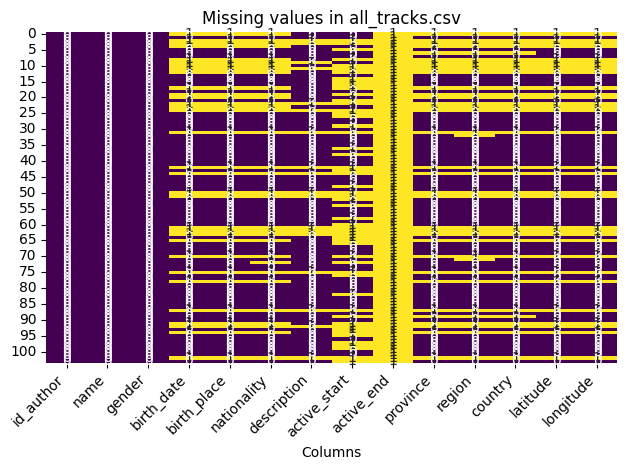

In [69]:
artists_reporter.plot_missing_values()

We can see that active end is missing for all artists, so we'll drop it.
Active start is missing for half of the artists

In [70]:
artists_reporter.report_duplicated_rows()

Empty DataFrame
Columns: [id_author, name, gender, birth_date, birth_place, nationality, description, active_start, active_end, province, region, country, latitude, longitude]
Index: []


In [71]:
artists_reporter.report_invalid_values()
print(f"Features not validated: {artists_reporter['not_validated']}")


['region']
Features not validated: ['id_author', 'name', 'birth_place', 'nationality', 'description', 'province', 'country']


In [72]:
print(f"Number of invalid arguments in region is {len(artists_reporter['invalid']['region'])}")
artists_reporter['invalid']['region']

Number of invalid arguments in region is 36


[(0, "value 'nan' not in allowed set"),
 (2, "value 'nan' not in allowed set"),
 (3, "value 'nan' not in allowed set"),
 (4, "value 'nan' not in allowed set"),
 (6, "value 'nan' not in allowed set"),
 (8, "value 'nan' not in allowed set"),
 (9, "value 'nan' not in allowed set"),
 (10, "value 'nan' not in allowed set"),
 (11, "value 'nan' not in allowed set"),
 (12, "value 'nan' not in allowed set"),
 (17, "value 'nan' not in allowed set"),
 (19, "value 'nan' not in allowed set"),
 (20, "value 'nan' not in allowed set"),
 (22, "value 'nan' not in allowed set"),
 (23, "value 'nan' not in allowed set"),
 (24, "value 'nan' not in allowed set"),
 (31, "value 'nan' not in allowed set"),
 (32, "value 'nan' not in allowed set"),
 (42, "value 'nan' not in allowed set"),
 (44, "value 'nan' not in allowed set"),
 (50, "value 'nan' not in allowed set"),
 (51, "value 'nan' not in allowed set"),
 (61, "value 'nan' not in allowed set"),
 (62, "value 'nan' not in allowed set"),
 (63, "value 'nan' not 

There are no invalid values, just missing ones.

The same is done with the tracks dataset

In [73]:

tracks_validators={
    'stats_pageviews': lambda df: check_numeric_range(df, column='stats_pageviews', start=0.0, end=float("inf")),
    'swear_IT': lambda df: check_numeric_range(df, column='swear_IT', start=0, end=1e6),
    'swear_EN' : lambda df: check_numeric_range(df, column='swear_EN', start=0, end=1e6),
    'year': lambda df: check_numeric_range(df, column='year', start=1920, end=2025),
    'month' : lambda df: check_numeric_range(df, column='month', start=1, end=12),
    "day" : lambda df: check_numeric_range(df, column='day', start=1, end=31),
    "n_sentences": lambda df: check_numeric_range(df, column='n_sentences', start=0, end=1e10),
    'n_tokens': lambda df: check_numeric_range(df, column='n_tokens', start=0, end=1e10),
    'tokens_per_sent' : lambda df: check_numeric_range(df, column='tokens_per_sent', start=0.0, end=float("inf")),
    'char_per_tok' : lambda df: check_numeric_range(df, column='char_per_tok', start=0.0, end=float("inf")),
    'lexical_density': lambda df: check_numeric_range(df, column='lexical_density', start=0.0, end=float("inf")),
    'avg_token_per_clause' : lambda df: check_numeric_range(df, column='avg_token_per_clause', start=0.0, end=float("inf")),
    'bpm': lambda df: check_numeric_range(df, column='bpm', start=0.0, end=float("inf")),
    'centroid': lambda df: check_numeric_range(df, column='centroid', start=0.0, end=float("inf")),
    'rollof': lambda df: check_numeric_range(df, column='rollof', start=0.0, end=float("inf")),
    'flux': lambda df: check_numeric_range(df, column='flux', start=0.0, end=float("inf")),
    'rms': lambda df: check_numeric_range(df, column='rms', start=0.0, end=float("inf")),
    'zcr': lambda df: check_numeric_range(df, column='zcr', start=0.0, end=float("inf")),
    'flatness': lambda df: check_numeric_range(df, column='flatness', start=0.0, end=float("inf")),
    'spectral_complexity':lambda df: check_numeric_range(df, column='spectral_complexity', start=0.0, end=float("inf")),
    'pitch':lambda df: check_numeric_range(df, column='pitch', start=0.0, end=float("inf")),
    'loudness':lambda df: check_numeric_range(df, column='loudness', start=0.0, end=float("inf")),
    'album_release_date': lambda df: check_date(df, column='album_release_date', date_min='1920-01-01'),
    'disc_number': lambda df: check_numeric_range(df, column='disc_number', start=0., end=1e6),
    'track_number':lambda df: check_numeric_range(df, column='track_number', start=0, end=1e6),
    'duration_ms':lambda df: check_numeric_range(df, column='duration_ms', start=0, end=1e12),
    'popularity':lambda df: check_numeric_range(df, column='popularity', start=0, end=1e12),
    'album_type':lambda df: check_in_set(df, column='album_type', valid_values={"album", "single", "compilation"}),
    'explicit':lambda df: check_in_set(df, column='explicit', valid_values={True, False}),
    'language':lambda df: check_in_set(df, column='language', valid_values=language_codes),
}


tracks_reporter = DataQualityReporter(tracks_df,tracks_validators, ['swear_IT_words', 'swear_EN_words'])
tracks_reporter.compute_report()
tracks_reporter.report_duplicated_rows()
tracks_reporter["missing_values"]

Empty DataFrame
Columns: [id, id_artist, name_artist, full_title, title, featured_artists, primary_artist, language, album, stats_pageviews, swear_IT, swear_EN, swear_IT_words, swear_EN_words, year, month, day, n_sentences, n_tokens, tokens_per_sent, char_per_tok, lexical_density, avg_token_per_clause, bpm, centroid, rolloff, flux, rms, zcr, flatness, spectral_complexity, pitch, loudness, album_name, album_release_date, album_type, disc_number, track_number, duration_ms, explicit, popularity, album_image, id_album, lyrics, modified_popularity]
Index: []

[0 rows x 45 columns]


featured_artists        7649
language                 105
album                   1514
stats_pageviews         6524
year                     438
month                   1197
day                     1323
n_sentences               76
n_tokens                  76
tokens_per_sent           76
char_per_tok              76
lexical_density           76
avg_token_per_clause      76
bpm                       64
centroid                  64
rolloff                   64
flux                      64
rms                       64
zcr                       64
flatness                  64
spectral_complexity       64
pitch                     64
loudness                  64
album_name                78
album_release_date       339
album_type                78
disc_number               78
track_number              78
duration_ms               78
explicit                  78
popularity                29
album_image               78
id_album                  78
lyrics                     3
dtype: int64

In [74]:
tracks_reporter.report_invalid_values()

['year', 'popularity']


In [75]:
print(f"Feature year has {len(tracks_reporter['invalid']['year'])} invalid values")
print(f"Feature popularity has {len(tracks_reporter['invalid']['popularity'])} invalid values")

print(len(list(filter(lambda x: "large" not in x[1], tracks_reporter['invalid']['year']))))
len(list(filter(lambda x: "large" in x[1], tracks_reporter['invalid']['year'])))

Feature year has 1340 invalid values
Feature popularity has 28 invalid values
304


1036

Delete useless rows

In [76]:
# === Function to generate missing info dictionary ===
def get_missing_info(df, threshold):
    row_missing = {}
    for idx in df.index:
        missing_count = df.loc[idx].isnull().sum()
        if missing_count > 0:
            row_missing[idx] = {
                'missing_count': missing_count,
                'missing_pct': round(missing_count / len(df.columns), 3)
            }

    # Sort dictionary by missing_pct descending
    sorted_missing = dict(sorted(row_missing.items(), key=lambda x: x[1]['missing_pct'], reverse=True))

    # Get list of row indices to drop
    to_drop = [idx for idx, info in sorted_missing.items() if info['missing_pct'] > threshold]

    return sorted_missing, to_drop

# === Adjustable thresholds (percentage of missing values) ===
track_missing_thresh = 0.3
artist_missing_thresh = 0.5

# === Tracks ===
print("\n--- TRACKS ---")
track_missing_dict, tracks_to_drop = get_missing_info(tracks_df, track_missing_thresh)

# Preview top 5 rows with most missing fields
print("Top 5 rows with most missing fields (tracks):")
for i, (idx, info) in enumerate(track_missing_dict.items()):
    print(f"Row {idx}: {info}")
    if i == 4:
        break

print(f"\nTracks rows with more than {track_missing_thresh} missing fields: {len(tracks_to_drop)}")

# === Artists ===
print("\n--- ARTISTS ---")
artist_missing_dict, artists_to_drop = get_missing_info(artists_df, artist_missing_thresh)

print("Top 5 rows with most missing fields (artists):")
for i, (idx, info) in enumerate(artist_missing_dict.items()):
    print(f"Row {idx}: {info}")
    if i == 4:
        break

print(f"\nArtist rows with more than {artist_missing_thresh} missing fields: {len(artists_to_drop)}")



--- TRACKS ---
Top 5 rows with most missing fields (tracks):
Row 3675: {'missing_count': np.int64(20), 'missing_pct': np.float64(0.444)}
Row 3677: {'missing_count': np.int64(20), 'missing_pct': np.float64(0.444)}
Row 3692: {'missing_count': np.int64(20), 'missing_pct': np.float64(0.444)}
Row 3704: {'missing_count': np.int64(20), 'missing_pct': np.float64(0.444)}
Row 3706: {'missing_count': np.int64(20), 'missing_pct': np.float64(0.444)}

Tracks rows with more than 0.3 missing fields: 88

--- ARTISTS ---
Top 5 rows with most missing fields (artists):
Row 2: {'missing_count': np.int64(11), 'missing_pct': np.float64(0.786)}
Row 3: {'missing_count': np.int64(11), 'missing_pct': np.float64(0.786)}
Row 11: {'missing_count': np.int64(11), 'missing_pct': np.float64(0.786)}
Row 22: {'missing_count': np.int64(11), 'missing_pct': np.float64(0.786)}
Row 24: {'missing_count': np.int64(11), 'missing_pct': np.float64(0.786)}

Artist rows with more than 0.5 missing fields: 32


In [77]:
# Step 1: Get artist IDs to be dropped
artist_ids_to_drop = artists_df.loc[artists_to_drop, 'id_author'].dropna().unique()

# Step 2: Count how many tracks are by those artists
tracks_by_dropped_artists = tracks_df[tracks_df['id_artist'].isin(artist_ids_to_drop)]
n_tracks_to_drop_due_to_artists = len(tracks_by_dropped_artists)

print(f"\nNumber of tracks associated with the artists that would be deleted: {n_tracks_to_drop_due_to_artists}")



Number of tracks associated with the artists that would be deleted: 2578


## Dropping useless features

In [78]:
# Print all feature names
print(tracks_df.columns.tolist())

# Print total number of features
print(f"\nTotal number of features: {tracks_df.shape[1]}")

['id', 'id_artist', 'name_artist', 'full_title', 'title', 'featured_artists', 'primary_artist', 'language', 'album', 'stats_pageviews', 'swear_IT', 'swear_EN', 'swear_IT_words', 'swear_EN_words', 'year', 'month', 'day', 'n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'lexical_density', 'avg_token_per_clause', 'bpm', 'centroid', 'rolloff', 'flux', 'rms', 'zcr', 'flatness', 'spectral_complexity', 'pitch', 'loudness', 'album_name', 'album_release_date', 'album_type', 'disc_number', 'track_number', 'duration_ms', 'explicit', 'popularity', 'album_image', 'id_album', 'lyrics', 'modified_popularity']

Total number of features: 45


In [79]:
to_drop = ['id', 'full_title', 'primary_artist', 'album', 'album_image', 'id_album', 'modified_popularity']
tracks_df = tracks_df.drop(columns=to_drop)

In [80]:
# Print all feature names
print(tracks_df.columns.tolist())

# Print total number of features
print(f"\nTotal number of features: {tracks_df.shape[1]}")

['id_artist', 'name_artist', 'title', 'featured_artists', 'language', 'stats_pageviews', 'swear_IT', 'swear_EN', 'swear_IT_words', 'swear_EN_words', 'year', 'month', 'day', 'n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'lexical_density', 'avg_token_per_clause', 'bpm', 'centroid', 'rolloff', 'flux', 'rms', 'zcr', 'flatness', 'spectral_complexity', 'pitch', 'loudness', 'album_name', 'album_release_date', 'album_type', 'disc_number', 'track_number', 'duration_ms', 'explicit', 'popularity', 'lyrics']

Total number of features: 38


## Correlation Matrix and Dropping Features

Tracks Dataset

In [81]:
# Select only numeric features
tracks_numeric = tracks_df.select_dtypes(include=['number', 'bool'])
tracks_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stats_pageviews       4642 non-null   Int64  
 1   swear_IT              11166 non-null  Int64  
 2   swear_EN              11166 non-null  Int64  
 3   year                  10728 non-null  Int64  
 4   month                 9969 non-null   Int64  
 5   day                   9843 non-null   Int64  
 6   n_sentences           11090 non-null  Int64  
 7   n_tokens              11090 non-null  Int64  
 8   tokens_per_sent       11090 non-null  float64
 9   char_per_tok          11090 non-null  float64
 10  lexical_density       11090 non-null  float64
 11  avg_token_per_clause  11090 non-null  float64
 12  bpm                   11102 non-null  float64
 13  centroid              11102 non-null  float64
 14  rolloff               11102 non-null  float64
 15  flux               

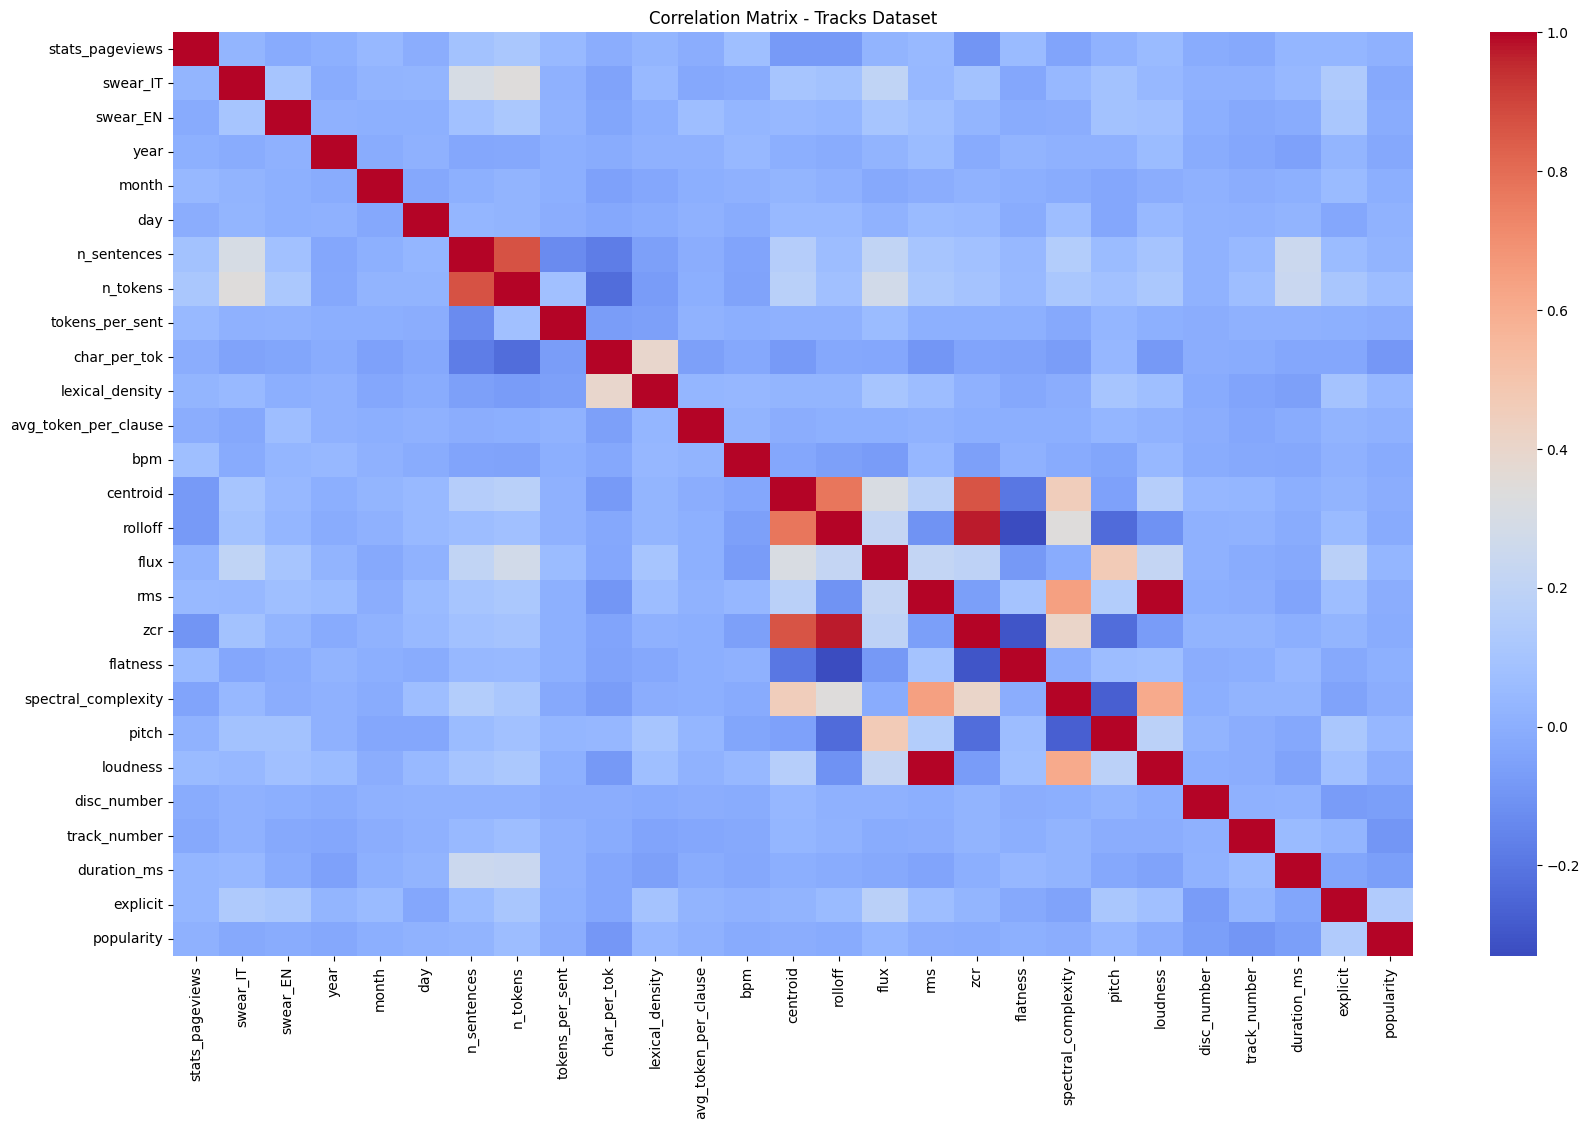

In [82]:
# Compute correlations
corr_matrix = tracks_numeric.corr()

# Display a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix - Tracks Dataset")
plt.show()

In [83]:
# Find highly correlated pairs (corr > 80%)
features = tracks_numeric.columns
correl_attrib = []
n_row, n_col = corr_matrix.shape[0], corr_matrix.shape[1]

CORREL_THRESHOLD = 0.8

for i in range(n_row):
    for j in range(i + 1, n_col):
        if np.abs(corr_matrix.iloc[i, j]) > CORREL_THRESHOLD:
            correl_attrib.append((features[i], features[j], corr_matrix.iloc[i, j]))

correl_attrib


[('n_sentences', 'n_tokens', np.float64(0.8677218438222596)),
 ('centroid', 'zcr', np.float64(0.8644647325148174)),
 ('rolloff', 'zcr', np.float64(0.9691010233392818)),
 ('rms', 'loudness', np.float64(0.9955550748884688))]

In [84]:
# Dropping correlated features
to_drop = ['n_sentences', 'zcr', 'rms']
tracks_df = tracks_df.drop(columns=to_drop)

In [85]:
# Print all feature names
print(tracks_df.columns.tolist())

# Print total number of features
print(f"\nTotal number of features: {tracks_df.shape[1]}")

['id_artist', 'name_artist', 'title', 'featured_artists', 'language', 'stats_pageviews', 'swear_IT', 'swear_EN', 'swear_IT_words', 'swear_EN_words', 'year', 'month', 'day', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'lexical_density', 'avg_token_per_clause', 'bpm', 'centroid', 'rolloff', 'flux', 'flatness', 'spectral_complexity', 'pitch', 'loudness', 'album_name', 'album_release_date', 'album_type', 'disc_number', 'track_number', 'duration_ms', 'explicit', 'popularity', 'lyrics']

Total number of features: 35


Artists Dataset

In [86]:
# Select only numeric features
artists_numeric = artists_df.select_dtypes(include=['number', 'bool'])
artists_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   72 non-null     float64
 1   longitude  72 non-null     float64
dtypes: float64(2)
memory usage: 1.8 KB
